In [1]:
import numpy as np
import pandas as pd
from google.colab import files
uploaded= files.upload()

In [ ]:
dataset = pd.read_csv("diabetes.csv")

In [ ]:
dataset.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [ ]:
x = dataset.iloc[:,0:8]
y = dataset["Outcome"]

In [ ]:
#preprocess the data
from sklearn.preprocessing import StandardScaler
std = StandardScaler()
x = std.fit_transform(x)

In [ ]:
x

array([[ 0.63994726,  0.84832379,  0.14964075, ...,  0.20401277,
         0.46849198,  1.4259954 ],
       [-0.84488505, -1.12339636, -0.16054575, ..., -0.68442195,
        -0.36506078, -0.19067191],
       [ 1.23388019,  1.94372388, -0.26394125, ..., -1.10325546,
         0.60439732, -0.10558415],
       ...,
       [ 0.3429808 ,  0.00330087,  0.14964075, ..., -0.73518964,
        -0.68519336, -0.27575966],
       [-0.84488505,  0.1597866 , -0.47073225, ..., -0.24020459,
        -0.37110101,  1.17073215],
       [-0.84488505, -0.8730192 ,  0.04624525, ..., -0.20212881,
        -0.47378505, -0.87137393]])

In [ ]:
#trai and test
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size=0.2,random_state = 1)

In [ ]:
print(x_train.shape)
print(x_test.shape)
print(y_train.shape)
print(y_test.shape)

(614, 8)
(154, 8)
(614,)
(154,)


In [ ]:
import tensorflow as tf
from tensorflow import keras

In [ ]:
print(tf.__version__)

2.3.0


In [ ]:
model = keras.Sequential()

In [ ]:
model.add(keras.layers.Dense(10,activation='relu'))
model.add(keras.layers.Dense(8,activation='relu'))
model.add(keras.layers.Dense(8,activation='relu'))

In [ ]:
#SGD
model.compile(optimizer='sgd',loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),metrics=['accuracy'])

In [ ]:
sgd=model.fit(x_train,y_train,batch_size=10,epochs=500)

Epoch 1/500
62/62 [==============================] - 0s 959us/step - loss: 1.6675 - accuracy: 0.5407
Epoch 2/500
62/62 [==============================] - 0s 1ms/step - loss: 1.0530 - accuracy: 0.6564
Epoch 3/500
62/62 [==============================] - 0s 1ms/step - loss: 0.7897 - accuracy: 0.6889
Epoch 4/500
62/62 [==============================] - 0s 1ms/step - loss: 0.6646 - accuracy: 0.7166
Epoch 5/500
62/62 [==============================] - 0s 1ms/step - loss: 0.5991 - accuracy: 0.7378
Epoch 6/500
62/62 [==============================] - 0s 908us/step - loss: 0.5626 - accuracy: 0.7508
Epoch 7/500
62/62 [==============================] - 0s 953us/step - loss: 0.5328 - accuracy: 0.7655
Epoch 8/500
62/62 [==============================] - 0s 919us/step - loss: 0.5206 - accuracy: 0.7606
Epoch 9/500
62/62 [==============================] - 0s 964us/step - loss: 0.5078 - accuracy: 0.7622
Epoch 10/500
62/62 [==============================] - 0s 879us/step - loss: 0.5005 - accuracy: 0.77

In [ ]:
test_loss, test_acc = model.evaluate(x_test,  y_test, verbose=2)
print('\nTest accuracy:', test_acc)

5/5 - 0s - loss: 0.5039 - accuracy: 0.7922

Test accuracy: 0.7922077775001526


In [ ]:
train_loss, train_acc = model.evaluate(x_train,  y_train, verbose=2)
print('\nTrain accuracy:', train_acc*100)

20/20 - 0s - loss: 0.3690 - accuracy: 0.8127

Train accuracy: 81.27036094665527


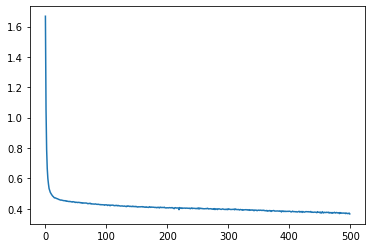

In [ ]:
import matplotlib.pyplot as plt
plt.plot(sgd.history['loss'])


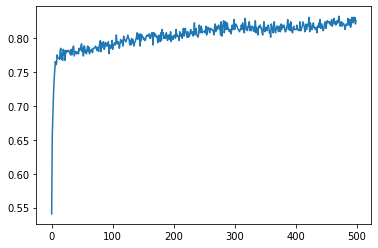

In [ ]:
plt.plot(sgd.history['accuracy'])

In [ ]:
#Adam
model.compile(optimizer='adam',loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),metrics=['accuracy'])

In [ ]:
adam=model.fit(x_train,y_train,batch_size=10,epochs=500)

Epoch 1/500
62/62 [==============================] - 0s 1ms/step - loss: 0.3682 - accuracy: 0.8208
Epoch 2/500
62/62 [==============================] - 0s 1ms/step - loss: 0.3647 - accuracy: 0.8290
Epoch 3/500
62/62 [==============================] - 0s 962us/step - loss: 0.3591 - accuracy: 0.8257
Epoch 4/500
62/62 [==============================] - 0s 999us/step - loss: 0.3627 - accuracy: 0.8306
Epoch 5/500
62/62 [==============================] - 0s 962us/step - loss: 0.3599 - accuracy: 0.8306
Epoch 6/500
62/62 [==============================] - 0s 1ms/step - loss: 0.3609 - accuracy: 0.8371
Epoch 7/500
62/62 [==============================] - 0s 963us/step - loss: 0.3646 - accuracy: 0.8290
Epoch 8/500
62/62 [==============================] - 0s 999us/step - loss: 0.3612 - accuracy: 0.8322
Epoch 9/500
62/62 [==============================] - 0s 956us/step - loss: 0.3608 - accuracy: 0.8339
Epoch 10/500
62/62 [==============================] - 0s 940us/step - loss: 0.3620 - accuracy: 0.

In [ ]:
test_loss, test_acc = model.evaluate(x_test,  y_test, verbose=2)
print('\nTest accuracy:', test_acc*100)
train_loss, train_acc = model.evaluate(x_train,  y_train, verbose=2)
print('\nTrain accuracy:', train_acc*100)

5/5 - 0s - loss: 0.6031 - accuracy: 0.7597

Test accuracy: 75.97402334213257
20/20 - 0s - loss: 0.3045 - accuracy: 0.8550

Train accuracy: 85.50488352775574


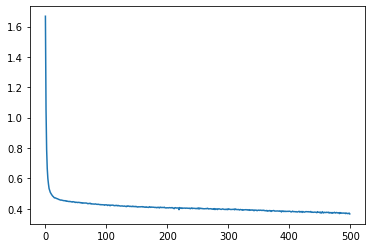

In [ ]:
plt.plot(sgd.history['loss'])

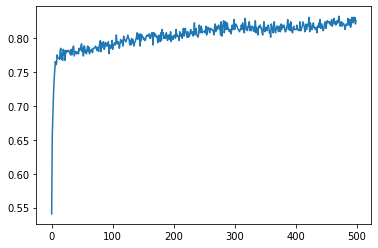

In [ ]:
plt.plot(sgd.history['accuracy'])

In [ ]:
#RMS
model.compile(optimizer='rmsprop',loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),metrics=['accuracy'])

In [ ]:
rms=model.fit(x_train,y_train,batch_size=10,epochs=500)

Epoch 1/500
62/62 [==============================] - 0s 958us/step - loss: 0.3130 - accuracy: 0.8583
Epoch 2/500
62/62 [==============================] - 0s 945us/step - loss: 0.3148 - accuracy: 0.8550
Epoch 3/500
62/62 [==============================] - 0s 984us/step - loss: 0.3130 - accuracy: 0.8616
Epoch 4/500
62/62 [==============================] - 0s 1ms/step - loss: 0.3118 - accuracy: 0.8583
Epoch 5/500
62/62 [==============================] - 0s 981us/step - loss: 0.3147 - accuracy: 0.8599
Epoch 6/500
62/62 [==============================] - 0s 972us/step - loss: 0.3133 - accuracy: 0.8567
Epoch 7/500
62/62 [==============================] - 0s 993us/step - loss: 0.3137 - accuracy: 0.8632
Epoch 8/500
62/62 [==============================] - 0s 975us/step - loss: 0.3116 - accuracy: 0.8518
Epoch 9/500
62/62 [==============================] - 0s 927us/step - loss: 0.3132 - accuracy: 0.8583
Epoch 10/500
62/62 [==============================] - 0s 980us/step - loss: 0.3147 - accuracy

In [ ]:
test_loss, test_acc = model.evaluate(x_test,  y_test, verbose=2)
print('\nTest accuracy:', test_acc*100)
train_loss, train_acc = model.evaluate(x_train,  y_train, verbose=2)
print('\nTrain accuracy:', train_acc*100)

5/5 - 0s - loss: 1.2296 - accuracy: 0.7662

Test accuracy: 76.6233742237091
20/20 - 0s - loss: 0.2840 - accuracy: 0.8616

Train accuracy: 86.1563503742218


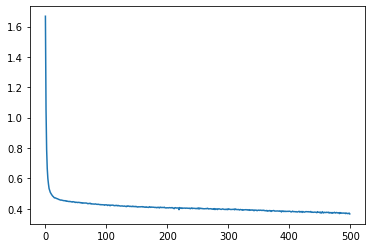

In [ ]:
plt.plot(sgd.history['loss'])

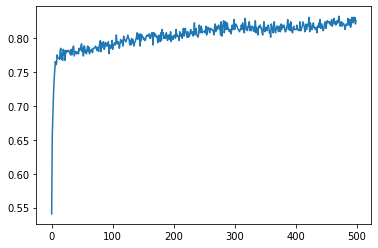

In [ ]:
plt.plot(sgd.history['accuracy'])